# Read data from R and process 

In [11]:
df <- read.csv("C:/Users/stati/OneDrive/Desktop/Research/windows10_dataset.csv")
df <- na.omit(df)

In [12]:
df = Filter(function(x)(length(unique(x))>1), df)

In [13]:
dim(df)

[1] 35214   108

In [5]:
write.csv(df,'C:/Users/stati/OneDrive/Desktop/Research/windows10_dataset_processed.csv')

# Required Libraries

We are going to use Windows 10 system generated values to predict whether the system is under cyber attack or not !

In [8]:
import numpy as np
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors

# Loading the data and EDA


In [16]:
# Set the working directory
import os
os.chdir("C:/Users/stati/OneDrive/Desktop/Research")

In [43]:
import pandas as pd
df = pd.read_csv('windows10_dataset_processed.csv',encoding='latin-1')

In [44]:
df

,Unnamed: 0,ï..ts,Processor_DPC_Rate,Processor_pct_.Idle_Time,Processor_pct_.Interrupt_Time,Processor_pct_.User_Time,Processor_pct_.C1_Time,Processor_pct_.Processor_Time,Processor_C1_ransitions_sec,Processor_pct_.DPC_Time,...,LogicalDisk._Total..Avg..Disk.Write.Queue.Length,LogicalDisk._Total..Avg..Disk.Queue.Length,LogicalDisk._Total..pct_.Disk.Read.Time,LogicalDisk._Total..Disk.Write.Bytes.sec,LogicalDisk._Total..Disk.Transfers.sec,LogicalDisk._Total..Avg..Disk.Bytes.Transfer,LogicalDisk._Total..pct_.Disk.Write.Time,LogicalDisk._Total..Avg..Disk.sec.Transfer,label,type
0,1,1554206309,4,29.908172,0.078240,61.027509,29.908172,66.200149,480.094991,0.078240,...,0.134876,0.163098,2.822198,1.924988e+06,402.582784,9100.481592,13.487612,0.000405,0,normal
1,2,1554206319,9,31.751682,0.312521,59.144594,31.751682,66.247735,427.041284,0.078130,...,0.157564,0.189279,3.171506,1.497233e+06,355.134332,11153.554490,15.756429,0.000533,0,normal
2,3,1554206329,5,29.495167,1.168222,46.027940,29.495167,66.900381,1159.426821,0.233644,...,0.401774,0.782472,38.069810,1.854229e+06,760.431768,26994.265950,40.177378,0.001028,0,normal
3,4,1554206339,12,18.224375,1.097192,47.806219,18.224375,79.545208,736.622011,0.313483,...,0.259062,0.768934,50.987167,1.591239e+07,699.499954,53141.663800,25.906233,0.001099,0,normal
4,5,1554206349,12,14.861187,1.562431,41.873151,14.861187,82.735137,896.108598,0.703094,...,0.103836,1.081730,97.789353,2.360930e+07,1184.550425,40988.684440,10.383619,0.000913,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35209,35971,1556099926,0,65.611199,0.078247,29.968737,65.611199,33.176760,226.087362,0.000000,...,0.000486,0.000486,0.000000,8.872802e+03,1.702918,5210.352941,0.016214,0.000286,0,normal
35210,35972,1556099936,0,96.829418,0.000000,0.234245,96.829418,0.367761,284.841927,0.000000,...,0.000350,0.000431,0.002704,1.284407e+04,1.199334,16170.666670,0.011677,0.000360,0,normal
35211,35973,1556099946,0,95.294715,0.000000,2.108141,95.294715,2.088548,263.642684,0.000000,...,0.000168,0.000168,0.000000,9.824538e+03,0.499702,19660.800000,0.005594,0.000336,0,normal
35212,35974,1556099956,0,94.927619,0.000000,0.859393,94.927619,2.810513,342.110790,0.000000,...,0.000440,0.000440,0.000000,2.129987e+04,1.500047,14199.466670,0.014671,0.000293,0,normal


In [45]:
#df_new = df[list(vif_data.feature)]
#df_new['label'] = df['label']

In [46]:
df = df.drop(df.columns[0],axis=1)

In [47]:
df = df.drop(df.columns[0],axis=1)

In [19]:
#df = df.drop(columns=df.columns[0], axis=1, inplace=True)
#df.columns

AttributeError: 'NoneType' object has no attribute 'columns'

In [48]:
# Attack counts by type:
pd.crosstab(index=df['label'], columns=df['type'])

type,ddos,dos,injection,mitm,normal,password,scanning,xss
label,,,,,,,,
0,0,0,0,0,24283,0,0,0
1,4539,505,606,13,0,3594,434,1240


In [49]:
# Remove the label column:
df = df.drop(['type'],axis=1)

In [50]:
df.head()

,Processor_DPC_Rate,Processor_pct_.Idle_Time,Processor_pct_.Interrupt_Time,Processor_pct_.User_Time,Processor_pct_.C1_Time,Processor_pct_.Processor_Time,Processor_C1_ransitions_sec,Processor_pct_.DPC_Time,Processor_pct_.Privileged_Time,Processor_DPCs_Queued_sec,...,LogicalDisk._Total..Avg..Disk.Bytes.Read,LogicalDisk._Total..Avg..Disk.Write.Queue.Length,LogicalDisk._Total..Avg..Disk.Queue.Length,LogicalDisk._Total..pct_.Disk.Read.Time,LogicalDisk._Total..Disk.Write.Bytes.sec,LogicalDisk._Total..Disk.Transfers.sec,LogicalDisk._Total..Avg..Disk.Bytes.Transfer,LogicalDisk._Total..pct_.Disk.Write.Time,LogicalDisk._Total..Avg..Disk.sec.Transfer,label
0,4,29.908172,0.078240,61.027509,29.908172,66.200149,480.094991,0.078240,5.163866,568.322711,...,20546.65089,0.134876,0.163098,2.822198,1.924988e+06,402.582784,9100.481592,13.487612,0.000405,0
1,9,31.751682,0.312521,59.144594,31.751682,66.247735,427.041284,0.078130,7.109852,512.249521,...,25742.31139,0.157564,0.189279,3.171506,1.497233e+06,355.134332,11153.554490,15.756429,0.000533,0
2,5,29.495167,1.168222,46.027940,29.495167,66.900381,1159.426821,0.233644,20.872230,917.339935,...,35969.10535,0.401774,0.782472,38.069810,1.854229e+06,760.431768,26994.265950,40.177378,0.001028,0
3,12,18.224375,1.097192,47.806219,18.224375,79.545208,736.622011,0.313483,31.740194,894.340589,...,40019.44778,0.259062,0.768934,50.987167,1.591239e+07,699.499954,53141.663800,25.906233,0.001099,0
4,12,14.861187,1.562431,41.873151,14.861187,82.735137,896.108598,0.703094,40.857571,1381.842235,...,32025.59015,0.103836,1.081730,97.789353,2.360930e+07,1184.550425,40988.684440,10.383619,0.000913,0


# Making the data balance

In [254]:
#df = df_new

In [51]:
freq = df['label'].value_counts()
freq

0    24283
1    10931
Name: label, dtype: int64

In [52]:
freq = df['label'].value_counts()
delete_frac = round((freq[0] - freq[1])/freq[0],2)
df = df.drop(df.query('label == 0').sample(frac= delete_frac).index)
df['label'].value_counts()

1    10931
0    10927
Name: label, dtype: int64

## Checking column types and converting them in the right format:

In [36]:
#print(df.info())
#print(df.shape)

So, there a total of 47 features presented in this data file and number of rows are 35,975!

In [37]:
#columns = df.applymap(np.isreal).all()
#print((columns).value_counts())

So, there are a total of 69 categorical and 56 numerical columns available in this data file. We need to investigate that, the 69 categorical variables whether they are really categorical or there are some problem in data types for them. 

In [38]:
# Now considering blank space as missing entry and recategorizing the numerical object columns to actual number columns
#df.replace(r'^\s*$', np.nan, regex=True)

In [39]:
# Keeping the object columns only to convert them as numberical because they actualy is a numerical column but
# because of space available in the entry python considering this column as an object type.

#object_colmns = list(df.select_dtypes(include=['object']).columns)
#object_colmns.remove('type')

In [40]:
#df[object_colmns] = df[object_colmns].apply(pd.to_numeric, errors='coerce')

In [41]:
# Checking:
#columns = df.applymap(np.isreal).all()
#print((columns).value_counts())

In [42]:
#df.head()

Now, only the response variable seems categorical. So, we are good about our actual column types for the dataframe.

## Summary statistics for numerical columns

In [31]:
#df.describe()

,Unnamed: 0,ï..ts,Processor_DPC_Rate,Processor_pct_.Idle_Time,Processor_pct_.Interrupt_Time,Processor_pct_.User_Time,Processor_pct_.C1_Time,Processor_pct_.Processor_Time,Processor_C1_ransitions_sec,Processor_pct_.DPC_Time,...,LogicalDisk._Total..Avg..Disk.Bytes.Read,LogicalDisk._Total..Avg..Disk.Write.Queue.Length,LogicalDisk._Total..Avg..Disk.Queue.Length,LogicalDisk._Total..pct_.Disk.Read.Time,LogicalDisk._Total..Disk.Write.Bytes.sec,LogicalDisk._Total..Disk.Transfers.sec,LogicalDisk._Total..Avg..Disk.Bytes.Transfer,LogicalDisk._Total..pct_.Disk.Write.Time,LogicalDisk._Total..Avg..Disk.sec.Transfer,label
count,21858.000000,2.185800e+04,21858.000000,21858.000000,21858.000000,21858.000000,21858.000000,21858.000000,21858.000000,21858.000000,...,21858.000000,21858.000000,21858.000000,21858.000000,2.185800e+04,21858.000000,21858.000000,21858.000000,21858.000000,21858.000000
mean,19499.464544,1.555573e+09,4.485497,71.813949,0.200946,16.644063,71.813949,25.720137,480.491341,0.540591,...,13655.993316,0.015630,0.100906,3.182833,8.727357e+05,170.226240,24095.918454,1.174287,0.000630,0.500091
std,9643.444661,9.255675e+05,16.024353,20.714649,0.360907,14.403479,20.714649,20.678185,732.320872,1.215663,...,22351.898420,0.087193,0.357213,12.450906,2.839033e+06,613.871600,48236.762930,8.560096,0.000987,0.500011
min,3.000000,1.554192e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11922.250000,1.554323e+09,0.000000,62.335653,0.000000,5.304164,62.335653,8.203845,161.053581,0.000000,...,0.000000,0.000356,0.000411,0.000000,1.189689e+04,0.898666,11442.618180,0.011905,0.000292,0.000000
50%,20675.500000,1.556163e+09,0.000000,74.497874,0.078125,13.200820,74.497874,23.260707,307.906315,0.078126,...,0.000000,0.000893,0.001273,0.000000,2.995730e+04,2.799896,15731.934395,0.029984,0.000392,1.000000
75%,27634.750000,1.556263e+09,1.000000,89.340848,0.312011,24.334977,89.340848,34.845747,395.878641,0.546468,...,21894.212870,0.004112,0.005534,0.020367,1.846657e+05,15.624136,23159.538463,0.138179,0.000622,1.000000
max,35972.000000,1.556548e+09,195.000000,99.638956,9.937340,84.427167,99.638956,100.000000,10318.521390,21.953888,...,842420.018300,1.836753,4.236590,294.529448,5.340136e+07,7170.887411,977715.200000,183.675284,0.045244,1.000000


We are observing that the range of the columns are highly fluctuating for the columns. So, definitely the data needs to be standardize or we have to normalize the columns before feeding them in the model. But before that, we are going to observe the missing value distribution over the columns.

## Missing value % investigation and imputation:

In [32]:
#percent_missing = df.isnull().sum() * 100 / len(df)
#missing_value_df = pd.DataFrame({'column_name': df.columns,
 #                                'percent_missing': percent_missing})
#missing_value_df.sort_values('percent_missing', inplace=True)

In [34]:
#missing_value_df.tail()

The highest missing percentage is around 1.5% for Process_IO Read Bytes_sec column. So, we are good to go for missing value imputation. We will replace that missing entries by mean at this stage. Later we will check the performance after replacing with Median. 

In [269]:
#df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

In [270]:
#percent_missing = df.isnull().sum() * 100 / len(df)
#missing_value_df = pd.DataFrame({'column_name': df.columns,
 #                                'percent_missing': percent_missing})
#missing_value_df.sort_values('percent_missing', inplace=True)

In [35]:
#missing_value_df.tail()

## Seperating independent and dependent variables:

In [55]:
# Removing Y and Id
X = df.iloc [: ,:-1].values    # independent variables
# Keeping only Y
y = df.iloc [: , -1].values    # dependent variables

## Handling Inf values:


In [56]:
import numpy as np

# find min and max values for each column, ignoring nan, -inf, and inf
mins = [np.nanmin(X[:, i][X[:, i] != -np.inf]) for i in range(X.shape[1])]
maxs = [np.nanmax(X[:, i][X[:, i] != np.inf]) for i in range(X.shape[1])]

# go through matrix one column at a time and replace  + and -infinity 
# with the max or min for that column
for i in range(X.shape[1]):
    X[:, i][X[:, i] == -np.inf] = mins[i]
    X[:, i][X[:, i] == np.inf] = maxs[i]

## Standardizing all numerical columns 

In [57]:
# feature Scaling
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

# Train test Split

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2)

# Unsupervised modelling:

## SOM

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Minisom library and module is used for performing Self Organizing Maps
from minisom import MiniSom

In [60]:
def classify(som, data):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(X_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [61]:
# I use linear som topography
som_shape = (1, 2)
som = MiniSom(som_shape[0], som_shape[1], X_train.shape[1],sigma = 3, learning_rate=0.5, 
              neighborhood_function='triangle')
som.pca_weights_init(X_train)
som.train_random(X_train, 100, verbose=False)

print(classification_report(y_test, classify(som, X_test)))

C:\Users\stati\anaconda3\lib\site-packages\minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
C:\Users\stati\anaconda3\lib\site-packages\minisom.py:374: UserWarning: PCA initialization inappropriate:One of the dimensions of the map is 1.
  warn(msg)


              precision    recall  f1-score   support

           0       0.86      0.68      0.76      2186
           1       0.74      0.89      0.80      2186

    accuracy                           0.78      4372
   macro avg       0.80      0.78      0.78      4372
weighted avg       0.80      0.78      0.78      4372



## K-means clustering 

In [62]:
#Now let's open it with pandas
import pandas as pd
from pandas import Series,DataFrame
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics 


import warnings
warnings.filterwarnings('ignore')

In [65]:
def k_means_fit(covariates,centroid_method):
    data = pd.DataFrame(covariates)
    # from sklearn.cluster import KMeans 
    clusters = 2
    number_of_iteration = 100
    kmeans = KMeans(n_clusters = clusters,n_init= number_of_iteration,init = centroid_method,algorithm = "full") 
    kmeans.fit(data) 
    
    y_labels_test = kmeans.predict(X_test)
    tab = pd.crosstab(index=y_test, columns=y_labels_test)
    print (metrics.classification_report(y_test,y_labels_test))

In [66]:
k_means_fit(X_train,centroid_method = "random")

              precision    recall  f1-score   support

           0       1.00      0.67      0.80      2186
           1       0.75      1.00      0.86      2186

    accuracy                           0.83      4372
   macro avg       0.88      0.83      0.83      4372
weighted avg       0.88      0.83      0.83      4372



# Hierchical clustering 

In [67]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_test)
print (metrics.classification_report(y_test,cluster.labels_))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76      2186
           1       0.73      0.88      0.80      2186

    accuracy                           0.78      4372
   macro avg       0.79      0.78      0.78      4372
weighted avg       0.79      0.78      0.78      4372



# Result

Among these three clustering methods K-means clustering giving us the best classification accuracy which is 85%.

# Random forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection


In [70]:
forest = RandomForestClassifier()
#
# Fit the model
#
forest.fit(X_train, y_train)
 
#
# Measure model performance
#
y_pred = forest.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.987


# SVM

In [71]:
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 
# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9645


# Feature selection 

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
df = pd.read_csv('windows10_dataset_processed.csv',encoding='latin-1')

## Droping feature using correlation coefficient 

In [74]:
df.shape

(35214, 109)

In [75]:
X = df.iloc[:,2:107]

In [215]:
# Create correlation matrix
#corr_mat = X.corr(method='pearson').abs()
  
# Convert correlation matrix to 1-D Series and sort
#sorted_mat = corr_mat.unstack().sort_values()

In [76]:
# calculate the correlation matrix and reshape
df_corr = X.corr().abs().stack().reset_index()

# rename the columns
df_corr.columns = ['FEATURE_1', 'FEATURE_2', 'CORRELATION']
df_corr.head()


,FEATURE_1,FEATURE_2,CORRELATION
0,Processor_DPC_Rate,Processor_DPC_Rate,1.000000
1,Processor_DPC_Rate,Processor_pct_.Idle_Time,0.282400
2,Processor_DPC_Rate,Processor_pct_.Interrupt_Time,0.078619
3,Processor_DPC_Rate,Processor_pct_.User_Time,0.027659
4,Processor_DPC_Rate,Processor_pct_.C1_Time,0.282400


In [77]:
df_corr.shape

(11025, 3)

In [78]:
#df_corr_2 = df_corr[df_corr.CORRELATION<1]
df_corr_2 = df_corr[df_corr['FEATURE_1'] != df_corr['FEATURE_2']]

In [79]:
df_corr_2.shape

(10920, 3)

In [80]:
df_corr_3 = df_corr_2[df_corr_2.CORRELATION > 0.9]

In [81]:
df_corr_3.shape

(138, 3)

In [82]:
# Get unique list of variable names
lst1 = df_corr_3.FEATURE_1
remove_var = list(set(lst1))

In [83]:
len(remove_var)

55

In [84]:
df = pd.read_csv('windows10_dataset_processed.csv',encoding='latin-1')
df = df.drop(remove_var, axis=1)

In [85]:
df.shape

(35214, 54)

In [86]:
X = df.iloc[:,2:52]

<AxesSubplot:>

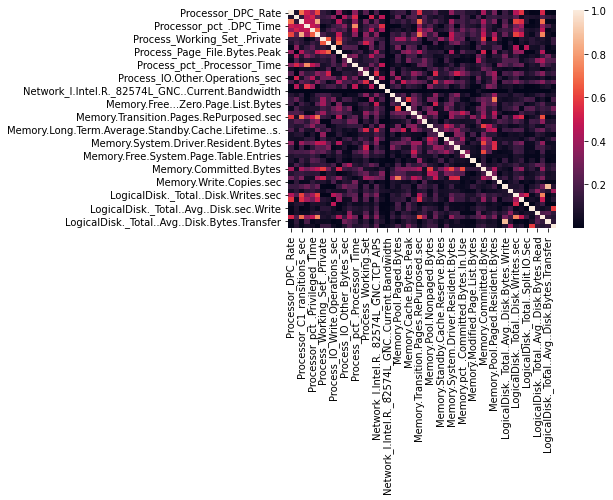

In [87]:
sns.heatmap(X.corr().abs(),annot=False)

## Droping feature using VIF

In [88]:
# VIF

 ## VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                                              feature        VIF
0                                  Processor_DPC_Rate   2.521219
1                       Processor_pct_.Interrupt_Time   2.609631
2                         Processor_C1_ransitions_sec   6.455360
3                             Processor_pct_.DPC_Time   4.822283
4                      Processor_pct_.Privileged_Time   4.927115
5                            Processor_Interrupts_sec   9.374438
6                        Process_Working_Set_.Private  10.003760
7                            Process_Working_Set_Peak   8.843264
8                     Process_IO_Write.Operations_sec   2.080531
9                        Process_Page_File.Bytes.Peak  11.897308
10                         Process_IO_Other_Bytes_sec   1.790077
11                         Process_IO_Write_Bytes_sec   2.458722
12                        Process_pct_.Processor_Time   2.695415
13                        Process_Pool.Nonpaged.Bytes   1.515351
14                       

In [89]:
vif_data = vif_data[vif_data.VIF>10]

In [90]:
selected_X_from_VIF = df[list(vif_data.feature)]

In [91]:
selected_X_from_VIF

,Process_Working_Set_.Private,Process_Page_File.Bytes.Peak,Process_Working.Set,Memory.Pool.Paged.Bytes,Memory.Cache.Bytes.Peak,Memory.Commit.Limit,Memory.Pool.Nonpaged.Bytes,Memory.pct_.Committed.Bytes.In.Use,Memory.Committed.Bytes,Memory.Pool.Paged.Resident.Bytes
0,1.185268e+09,9.375539e+09,1.319535e+09,284635136,815652864,6444666880,89763840,53.693804,3.460387e+09,83619840
1,1.188397e+09,9.379713e+09,1.322865e+09,284782592,815652864,6444666880,89747456,53.687639,3.459990e+09,83984384
2,1.327067e+09,9.379713e+09,1.412076e+09,284876800,815652864,6444666880,89743360,54.664438,3.522941e+09,79081472
3,1.276330e+09,9.662480e+09,1.317917e+09,282349568,815652864,6444666880,92037120,57.232499,3.688444e+09,52133888
4,1.142317e+09,9.845367e+09,1.166090e+09,282263552,815652864,6444666880,93446144,57.230783,3.688333e+09,29245440
...,...,...,...,...,...,...,...,...,...,...
35209,1.185944e+09,3.392492e+09,3.351544e+09,112078848,76492800,5770170368,94060544,59.991425,3.461607e+09,90677248
35210,1.188110e+09,3.390792e+09,3.346850e+09,112078848,76492800,5770170368,94060544,59.962392,3.459932e+09,90677248
35211,1.185698e+09,3.390792e+09,3.344355e+09,112078848,76492800,5770170368,94060544,59.957636,3.459658e+09,90677248
35212,1.201336e+09,3.392430e+09,3.365765e+09,112078848,76492800,5770170368,94064640,60.290417,3.478860e+09,90681344


Using the selected variables from high VIF to calculate the correlation coefficient to get the dropping list.

In [92]:
# calculate the correlation matrix and reshape
df_corr = selected_X_from_VIF.corr().abs().stack().reset_index()

# rename the columns
df_corr.columns = ['FEATURE_1', 'FEATURE_2', 'CORRELATION']
df_corr = df_corr[df_corr['FEATURE_1'] != df_corr['FEATURE_2']]

In [93]:
df_corr = df_corr[df_corr.CORRELATION>0.6]

In [94]:
df_corr

,FEATURE_1,FEATURE_2,CORRELATION
39,Memory.Pool.Paged.Bytes,Memory.Pool.Paged.Resident.Bytes,0.722673
78,Memory.pct_.Committed.Bytes.In.Use,Memory.Committed.Bytes,0.620311
87,Memory.Committed.Bytes,Memory.pct_.Committed.Bytes.In.Use,0.620311
93,Memory.Pool.Paged.Resident.Bytes,Memory.Pool.Paged.Bytes,0.722673


In [95]:
# Get unique list of variable names
lst1 = df_corr.FEATURE_1
remove_var = list(set(lst1))

In [96]:
df = df.drop(remove_var, axis=1)

In [97]:
X = df.iloc[:,2:48]

In [98]:
 ## VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                                              feature       VIF
0                                  Processor_DPC_Rate  2.514903
1                       Processor_pct_.Interrupt_Time  2.534748
2                         Processor_C1_ransitions_sec  6.299200
3                             Processor_pct_.DPC_Time  4.816040
4                      Processor_pct_.Privileged_Time  4.903292
5                            Processor_Interrupts_sec  9.204509
6                        Process_Working_Set_.Private  7.265765
7                            Process_Working_Set_Peak  7.214768
8                     Process_IO_Write.Operations_sec  2.007405
9                        Process_Page_File.Bytes.Peak  7.937695
10                         Process_IO_Other_Bytes_sec  1.755975
11                         Process_IO_Write_Bytes_sec  2.386929
12                        Process_pct_.Processor_Time  2.674068
13                        Process_Pool.Nonpaged.Bytes  1.315230
14                                Proces

Now all the features looks in a good shape in terms of multicolliniarity because all of the VIF under 10. We can use this independent variable set to build our machine learining model. 

In [99]:
vif_data.feature

0                                    Processor_DPC_Rate
1                         Processor_pct_.Interrupt_Time
2                           Processor_C1_ransitions_sec
3                               Processor_pct_.DPC_Time
4                        Processor_pct_.Privileged_Time
5                              Processor_Interrupts_sec
6                          Process_Working_Set_.Private
7                              Process_Working_Set_Peak
8                       Process_IO_Write.Operations_sec
9                          Process_Page_File.Bytes.Peak
10                           Process_IO_Other_Bytes_sec
11                           Process_IO_Write_Bytes_sec
12                          Process_pct_.Processor_Time
13                          Process_Pool.Nonpaged.Bytes
14                                  Process_Working.Set
15                      Process_IO.Other.Operations_sec
16                Network_I.Intel.R._82574L_GNC.TCP_APS
17        Network_I.Intel.R._82574L_GNC..Bytes.S


# Model fitting after removing variables:

In [100]:
df = pd.read_csv('windows10_dataset_processed.csv',encoding='latin-1')
df = df.drop(df.columns[0],axis=1)
df = df.drop(df.columns[0],axis=1)

In [101]:
df_new = df[list(vif_data.feature)]
df_new['label'] = df['label']

In [102]:
df = df_new

In [103]:
df.shape

(35214, 47)

In [104]:
df.head()

,Processor_DPC_Rate,Processor_pct_.Interrupt_Time,Processor_C1_ransitions_sec,Processor_pct_.DPC_Time,Processor_pct_.Privileged_Time,Processor_Interrupts_sec,Process_Working_Set_.Private,Process_Working_Set_Peak,Process_IO_Write.Operations_sec,Process_Page_File.Bytes.Peak,...,LogicalDisk._Total..Avg..Disk.sec.Read,LogicalDisk._Total..Disk.Writes.sec,LogicalDisk._Total..Current.Disk.Queue.Length,LogicalDisk._Total..Split.IO.Sec,LogicalDisk._Total..Avg..Disk.sec.Write,LogicalDisk._Total..Avg..Disk.Bytes.Read,LogicalDisk._Total..Disk.Write.Bytes.sec,LogicalDisk._Total..Avg..Disk.Bytes.Transfer,LogicalDisk._Total..Avg..Disk.sec.Transfer,label
0,4,0.078240,480.094991,0.078240,5.163866,2196.379505,1.185268e+09,5.639348e+09,282.909543,9.375539e+09,...,0.000333,317.960283,0,2.804059,0.000424,20546.65089,1.924988e+06,9100.481592,0.000405,0
1,9,0.312521,427.041284,0.078130,7.109852,2185.411272,1.188397e+09,5.639348e+09,230.722305,9.379713e+09,...,0.000331,259.425080,0,3.100300,0.000607,25742.31139,1.497233e+06,11153.554490,0.000533,0
2,5,1.168222,1159.426821,0.233644,20.872230,4418.832843,1.327067e+09,5.639348e+09,373.889746,9.379713e+09,...,0.000733,241.289892,0,5.080836,0.001664,35969.10535,1.854229e+06,26994.265950,0.001028,0
3,12,1.097192,736.622011,0.313483,31.740194,6617.558513,1.276330e+09,5.730271e+09,296.474808,9.662480e+09,...,0.000960,168.253216,0,4.113525,0.001540,40019.44778,1.591239e+07,53141.663800,0.001099,0
4,12,1.562431,896.108598,0.703094,40.857571,7302.095730,1.142317e+09,5.828006e+09,306.531906,9.845367e+09,...,0.001255,405.677538,0,4.997260,0.000256,32025.59015,2.360930e+07,40988.684440,0.000913,0


In [105]:
freq = df['label'].value_counts()
delete_frac = round((freq[0] - freq[1])/freq[0],2)
df = df.drop(df.query('label == 0').sample(frac= delete_frac).index)
df['label'].value_counts()

1    10931
0    10927
Name: label, dtype: int64

In [106]:
# Removing Y and Id
X = df.iloc [: ,:-1].values    # independent variables
# Keeping only Y
y = df.iloc [: , -1].values    # dependent variables



# find min and max values for each column, ignoring nan, -inf, and inf
mins = [np.nanmin(X[:, i][X[:, i] != -np.inf]) for i in range(X.shape[1])]
maxs = [np.nanmax(X[:, i][X[:, i] != np.inf]) for i in range(X.shape[1])]

# go through matrix one column at a time and replace  + and -infinity 
# with the max or min for that column
for i in range(X.shape[1]):
    X[:, i][X[:, i] == -np.inf] = mins[i]
    X[:, i][X[:, i] == np.inf] = maxs[i]
    
    
# feature Scaling
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2)

## Unsupervised models:

### SOM

In [107]:
# I use linear som topography
som_shape = (1, 2)
som = MiniSom(som_shape[0], som_shape[1], X_train.shape[1],sigma = 3, learning_rate=0.5, 
              neighborhood_function='triangle')
som.pca_weights_init(X_train)
som.train_random(X_train, 100, verbose=False)

print(classification_report(y_test, classify(som, X_test)))

              precision    recall  f1-score   support

           0       0.73      0.34      0.46      2186
           1       0.57      0.87      0.69      2186

    accuracy                           0.61      4372
   macro avg       0.65      0.61      0.57      4372
weighted avg       0.65      0.61      0.57      4372



### K-means

In [108]:
k_means_fit(X_train,centroid_method = "random")

              precision    recall  f1-score   support

           0       0.70      0.33      0.45      2186
           1       0.56      0.86      0.68      2186

    accuracy                           0.60      4372
   macro avg       0.63      0.60      0.57      4372
weighted avg       0.63      0.60      0.57      4372



### Hierarchical

In [109]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_test)
print (metrics.classification_report(y_test,cluster.labels_))

              precision    recall  f1-score   support

           0       0.43      0.67      0.52      2186
           1       0.25      0.11      0.15      2186

    accuracy                           0.39      4372
   macro avg       0.34      0.39      0.34      4372
weighted avg       0.34      0.39      0.34      4372



## Supervised

### Random Forest

In [110]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
 
# Measure model performance
y_pred = forest.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.988


### SVM

In [111]:
svc=SVC() 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9648


# Principal componenet analysis (PCA)

In [148]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=5)
principalComponents_breast = pca_breast.fit_transform(X)

In [149]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['pca1', 'pca2',"pca3","pca4","pca5"])

In [150]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))


Explained variation per principal component: [0.31055866 0.20690079 0.09936562 0.07366428 0.06290903]


In [151]:
principal_breast_Df.shape

(21858, 5)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(principal_breast_Df, y, stratify=y,test_size=0.2)

In [153]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
 
# Measure model performance
y_pred = forest.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [154]:
svc=SVC() 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9408


In [155]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_test)
print (metrics.classification_report(y_test,cluster.labels_))

              precision    recall  f1-score   support

           0       0.45      0.70      0.55      2186
           1       0.34      0.15      0.21      2186

    accuracy                           0.43      4372
   macro avg       0.39      0.43      0.38      4372
weighted avg       0.39      0.43      0.38      4372



In [157]:
k_means_fit(X_train,centroid_method = "random")

              precision    recall  f1-score   support

           0       0.45      0.68      0.54      2186
           1       0.33      0.16      0.21      2186

    accuracy                           0.42      4372
   macro avg       0.39      0.42      0.38      4372
weighted avg       0.39      0.42      0.38      4372



In [147]:
# I use linear som topography
som_shape = (1, 2)
som = MiniSom(som_shape[0], som_shape[1], X_train.shape[1],sigma = 3, learning_rate=0.5, 
              neighborhood_function='triangle')
som.pca_weights_init(X_train)
#som.train_random(X_train, 100, verbose=False)

#print(classification_report(y_test, classify(som, X_test)))

KeyError: 0